In [21]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

create ncfile for topo with ice front

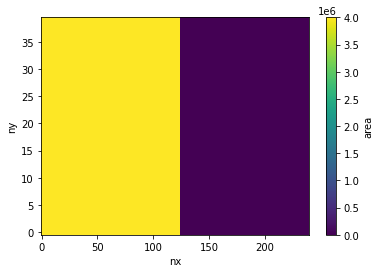

In [82]:
ice_thick = xr.open_dataset('INPUT/ice_shelf.nc')
ice_thick.area.plot()

In [83]:
ice_thick.area.values

array([[4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       ...,
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.],
       [4000000., 4000000., 4000000., ...,       0.,       0.,       0.]])

In [38]:
ice_thick_front = ice_thick.copy()

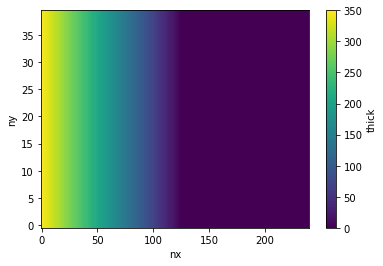

In [39]:
ice_thick_front.thick.plot()

In [40]:
ice_thick_front['thick'] = (ice_thick_front.thick.where(ice_thick_front.thick > 0)+200).fillna(0)

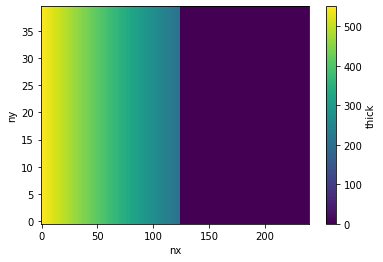

In [41]:
ice_thick_front.thick.plot()

In [42]:
#ice_thick_front.to_netcdf('ice_shelf_front.nc')

In [43]:
ice_thick_front.thick.isel(ny = 0).values[120:130]

array([214. , 211.2, 208.4, 205.6, 202.8,   0. ,   0. ,   0. ,   0. ,
         0. ])

In [86]:
ice_thick_front2= ice_thick.copy()
ice_thick_front2['thick'] = (ice_thick_front2.thick.where(ice_thick_front.thick > 0)+200).fillna(0)+ \
                            101.4*(ice_thick_front2.thick.where(ice_thick_front.nx == 125)+1).fillna(0)
ice_thick_front2['area'] = (ice_thick_front2.area.where(ice_thick_front2.thick>0)*0+4000000).fillna(0)
ice_thick_front2.thick.isel(ny = 0).values[120:130]


array([214. , 211.2, 208.4, 205.6, 202.8, 101.4,   0. ,   0. ,   0. ,
         0. ])

In [87]:
ice_thick_front2.area.isel(ny = 0).values[120:130]


array([4000000., 4000000., 4000000., 4000000., 4000000., 4000000.,
             0.,       0.,       0.,       0.])

In [88]:
ice_thick_front4= ice_thick.copy()
ice_thick_front4['thick'] = (ice_thick_front4.thick.where(ice_thick_front.thick > 0)+200).fillna(0)+ \
                            3/4*202.8*(ice_thick_front4.thick.where(ice_thick_front.nx == 125)+1).fillna(0) + \
                            2/4*202.8*(ice_thick_front4.thick.where(ice_thick_front.nx == 126)+1).fillna(0) + \
                            1/4*202.8*(ice_thick_front4.thick.where(ice_thick_front.nx == 127)+1).fillna(0)
ice_thick_front4['area'] = (ice_thick_front4.area.where(ice_thick_front4.thick>0)*0+4000000).fillna(0)

ice_thick_front4.thick.isel(ny = 0).values[120:130]

array([214. , 211.2, 208.4, 205.6, 202.8, 152.1, 101.4,  50.7,   0. ,
         0. ])

In [89]:
ice_thick_front8= ice_thick.copy()
ice_thick_front8['thick'] = (ice_thick_front8.thick.where(ice_thick_front.thick > 0)+200).fillna(0)+ \
                            7/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 125)+1).fillna(0) + \
                            6/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 126)+1).fillna(0) + \
                            5/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 127)+1).fillna(0) + \
                            4/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 128)+1).fillna(0) + \
                            3/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 129)+1).fillna(0) + \
                            2/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 130)+1).fillna(0) + \
                            1/8*202.8*(ice_thick_front8.thick.where(ice_thick_front.nx == 131)+1).fillna(0)
ice_thick_front8['area'] = (ice_thick_front8.area.where(ice_thick_front8.thick>0)*0+4000000).fillna(0)

ice_thick_front8.thick.isel(ny = 0).values[120:135]

array([214.  , 211.2 , 208.4 , 205.6 , 202.8 , 177.45, 152.1 , 126.75,
       101.4 ,  76.05,  50.7 ,  25.35,   0.  ,   0.  ,   0.  ])

In [90]:
ice_thick_front2.to_netcdf('INPUT/ice_shelf_front2.nc')
ice_thick_front4.to_netcdf('INPUT/ice_shelf_front4.nc')
ice_thick_front8.to_netcdf('INPUT/ice_shelf_front8.nc')


(100.0, 140.0)

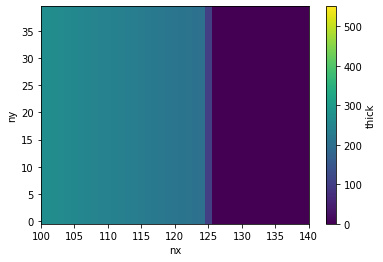

In [91]:
ice_thick_front2.thick.plot()
plt.xlim(100,140)

after running with `THICKNESS_CONFIG = "ISOMIP"`

In [96]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data
    new_thick.close()


In [97]:
make_thickness_file('INPUT/thickness_simpleshelf2front_pfile2.nc')

after running with `THICKNESS_CONFIG = "thickness_file"`

In [70]:
ave = False ## True means use 5 daily average rather than hourly prog
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/seamount/'
def open_files(folder):
    base = basee + folder
    if ave:
        prog = xr.open_dataset(base + '/ave_prog.nc')
    else:
        prog = xr.open_dataset(base + '/prog.nc')
    ocean_static = xr.open_dataset(base + "/ocean_geometry.nc")
    return prog, ocean_static
def open_IC(folder):
    base = basee + folder
    IC = xr.open_dataset(base + '/MOM_IC.nc')
    return IC
def open_Initialstate(folder):
    base = basee + folder
    IC = xr.open_dataset(base + '/Initial_state.nc')
    return IC

In [74]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog, ocean_static = open_files(label)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_91887/2269343888.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_91887/2269343888.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


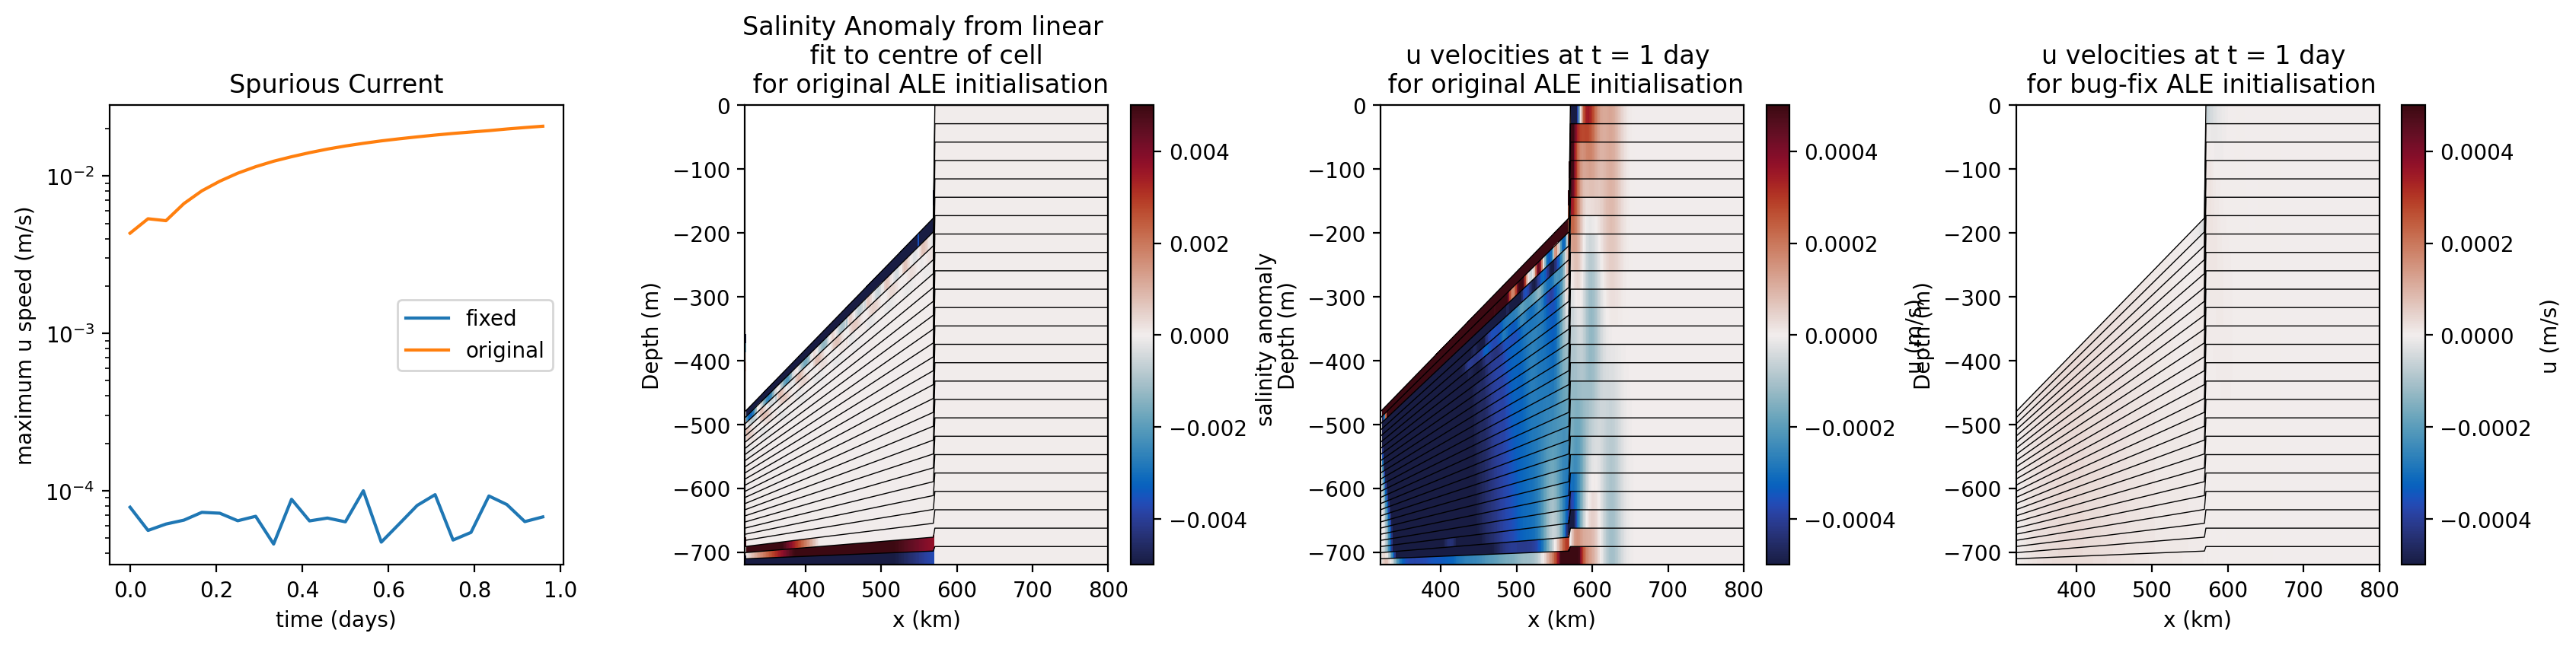

In [20]:
## Plot velocities
fig, axes = plt.subplots(ncols = 4, figsize = (20,4), dpi = 200)

label = 'simpleshelftest2icefront'
prog, ocean_static = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'fixed') ## I saved all timesteps = 5 mins
axes[0].set_ylabel('maximum u speed (m/s)')
axes[0].set_xlabel('time (days)')
axes[0].set_title('Spurious Current')

label = 'simpleshelftest2icefront_old'
prog, ocean_static = open_files(label)
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'original')

axes[0].set_yscale('log')
axes[0].legend()


label = 'simpleshelftest2icefront_old'
prog, ocean_static = open_files(label)
IC = open_IC(label)
x = -1
time = -1
ymax = 720
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"salinity anomaly \n",-5e-3,5e-3,cm.cm.balance,ymax)

plot(axes[2],x,time,0,prog.u,"u (m/s)",-0.0005,0.0005,cm.cm.balance,ymax)

axes[1].set_title('Salinity Anomaly from linear \n fit to centre of cell \n for original ALE initialisation')
axes[2].set_title('u velocities at t = 1 day \n for original ALE initialisation')

label = 'simpleshelftest2icefront'
prog, ocean_static = open_files(label)
IC = open_IC(label)
x = -1
time = -1
ymax = 720

plot(axes[3],x,time,0,prog.u,"u (m/s)",-0.0005,0.0005,cm.cm.balance,ymax)

axes[3].set_title('u velocities at t = 1 day \n for bug-fix ALE initialisation')

fig.subplots_adjust(wspace = 0.4)

Compare different runs

In [72]:
prog

<xarray.Dataset>
Dimensions:  (xq: 241, yh: 40, zl: 25, Time: 24, xh: 240, yq: 41, zi: 26)
Coordinates:
  * xq       (xq) float64 320.0 322.0 324.0 326.0 ... 794.0 796.0 798.0 800.0
  * yh       (yh) float64 1.0 3.0 5.0 7.0 9.0 11.0 ... 71.0 73.0 75.0 77.0 79.0
  * zl       (zl) float64 14.4 43.2 72.0 100.8 129.6 ... 619.2 648.0 676.8 705.6
  * Time     (Time) object 0001-01-01 01:00:00 ... 0001-01-02 00:00:00
  * xh       (xh) float64 321.0 323.0 325.0 327.0 ... 793.0 795.0 797.0 799.0
  * yq       (yq) float64 0.0 2.0 4.0 6.0 8.0 10.0 ... 72.0 74.0 76.0 78.0 80.0
  * zi       (zi) float64 0.0 28.8 57.6 86.4 115.2 ... 633.6 662.4 691.2 720.0
Data variables:
    u        (Time, zl, yh, xq) float32 nan 1.404e-06 ... -7.449e-08 nan
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

In [75]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    #prog, ocean_static = open_files(label)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_91887/805850591.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_91887/805850591.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/d

Text(0.5, 1.0, 'Spurious Current')

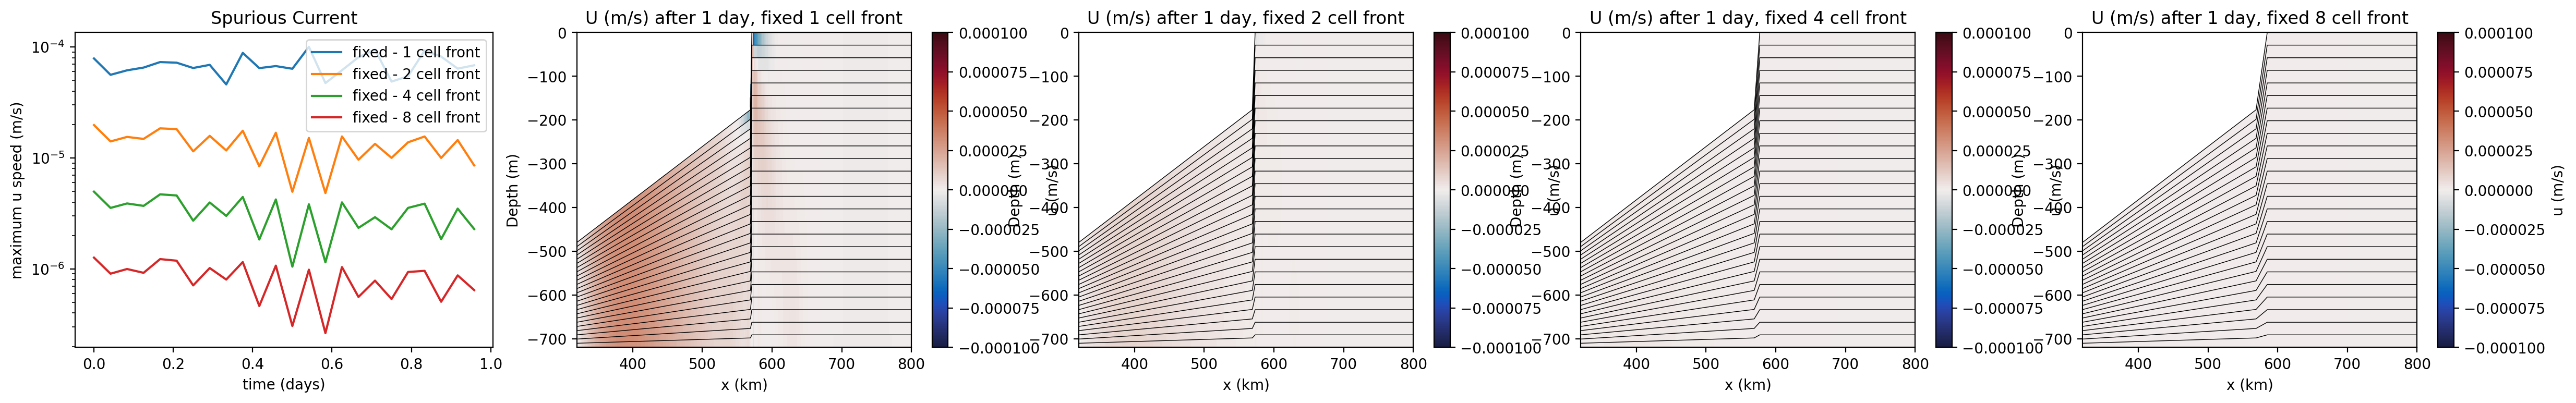

In [101]:
## Plot velocities
fig, axes = plt.subplots(ncols = 5, figsize = (30,4), dpi = 200)

ocean_static = xr.open_dataset('ocean_geometry.nc')
x = -1
time = -1
ymax = 720

prog = xr.open_dataset('OUTPUT/prog_1.nc')
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'fixed - 1 cell front') ## I saved all timesteps = 5 mins

plot(axes[1],x,time,0,prog.u,"u (m/s)",-0.0001,0.0001,cm.cm.balance,ymax)
axes[1].set_title('U (m/s) after 1 day, fixed 1 cell front')

prog = xr.open_dataset('OUTPUT/prog_2.nc')
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'fixed - 2 cell front')
plot(axes[2],x,time,0,prog.u,"u (m/s)",-0.0001,0.0001,cm.cm.balance,ymax)
axes[2].set_title('U (m/s) after 1 day, fixed 2 cell front')

prog = xr.open_dataset('OUTPUT/prog_4.nc')
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'fixed - 4 cell front')
plot(axes[3],x,time,0,prog.u,"u (m/s)",-0.0001,0.0001,cm.cm.balance,ymax)
axes[3].set_title('U (m/s) after 1 day, fixed 4 cell front')

prog = xr.open_dataset('OUTPUT/prog_8.nc')
axes[0].plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), label = 'fixed - 8 cell front')
plot(axes[4],x,time,0,prog.u,"u (m/s)",-0.0001,0.0001,cm.cm.balance,ymax)
axes[4].set_title('U (m/s) after 1 day, fixed 8 cell front')

axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_ylabel('maximum u speed (m/s)')
axes[0].set_xlabel('time (days)')
axes[0].set_title('Spurious Current')




/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_91887/805850591.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


(550.0, 600.0)

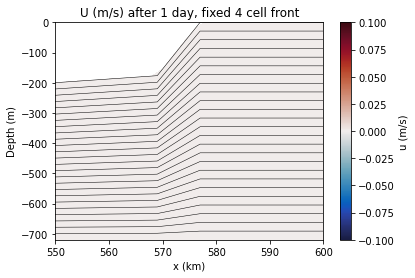

In [102]:

fig, ax = plt.subplots()
prog = xr.open_dataset('OUTPUT/prog_4.nc')
plot(ax,x,time,0,prog.u,"u (m/s)",-0.1,0.1,cm.cm.balance,ymax)
ax.set_title('U (m/s) after 1 day, fixed 4 cell front')

ax.set_xlim(550,600)